## CT Values

In [1]:
## BACKGROUND KNOWLEDGE

# CT values are specific to your sequence of interest and correspond to the number of cycles to reach
# a threshold

# Delta CT shows difference between the CT of your sequence of interest and CT of your reference
# CT of your ref should be a housekeeping gene

# HENCE Delta CT shows the difference of expression between two genes versus just the expression of one

# fold change is relative not percise hence how many folds more does this gene express more than a house-
# keeping gene? Thats what a qPCR determines

In [2]:
# import dep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# using this for selecting excel file
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tkinter import *

## Calc CT Values

In [3]:
#input raw excel file path

# Grabbing file to select
def grabfile():
    Tk().withdraw()
    filename = askopenfilename()
    input_file = filename
    print(filename, "file selected")
grabfile()





/Users/shayonkeating/Documents/Sadikot_Lab/Python_Scripts/pink1_mitofusin_pgc1a_gapdh_data.xls file selected


In [ ]:


def selection():

    import tkinter as tk

    root = tk.Tk()
    tk.Label(text="Please enter sequence of interest: ").grid(row=0,column=0)
    tk.Label(text="Please enter house keeping gene: ").grid(row=1,column=0)
    e = tk.Entry()
    p = tk.Entry()

    e.grid(row=0,column=1)
    p.grid(row=1,column=1)
    def get():
        gene = e.get()
        house_keeping = p.get()
        print(gene, house_keeping, "Submitted")
        root.destroy()
    exit_btn=Button(root,text='Submit',command= get,activebackground='grey',activeforeground='#AB78F1',bg='#58F0AB',highlightcolor='red',padx='10px',pady='3px')
    exit_btn.grid(row=2,column=1)
    root.resizable(False,False)
    root.title('Selections')
    root.mainloop()

selection()




  Submitted


In [16]:
# read raw excel file and separte sheets into dfs
xls = pd.ExcelFile(input_file)
# df1 = pd.read_excel(xls, 'Sample Setup')
df2 = pd.read_excel(xls, 'Results')
# df3 = pd.read_excel(xls, 'Raw Data')
# df4 = pd.read_excel(xls, 'Multicomponent Data')
# df5 = pd.read_excel(xls, 'Amplification Data')

# reset column names and clean df 
index_name = pd.Index((df2.iloc[6]).to_list())
index = df2.drop(df2.index[range(7)])
index.columns = index_name

# # select only what you need and drop na
# index = index[['Well', 'Sample Name', 'Target Name', 'Cт', 'Cт Mean', 'Cт SD']].dropna()

In [17]:
# def a gene select processing function that prints the output
gene1 = index.loc[index['Target Name'] == gene].reset_index()
housekeeping = index.loc[index['Target Name'] == house_keeping].reset_index()

# reads in triplicates or reads in duplicates
select_gene1 = gene1.loc[::3]
select_housekeeping = housekeeping.loc[::3]

# delta_ct and  then select first delta_ct value
delta_ct = (select_gene1['Cт Mean']-select_housekeeping['Cт Mean'])
first_delta_ct = delta_ct.iloc[0]

# delta delta ct
delta_ct2 = delta_ct - first_delta_ct

# fold change
fold_change = 2**(-delta_ct2)
gene1_list = [select_gene1['Sample Name'], select_gene1['Target Name'],
              delta_ct, delta_ct2, fold_change]
output = pd.DataFrame(gene1_list).transpose()
output.columns = ['Sample Name', 'Target Name', 
                           'Avg Delta CT', 'Delta Delta CT', 'Fold Inc']

# output save
output.to_excel(r'/Users/shayonkeating/Documents/Sadikot_Lab/qPCR_output/qPCR.xlsx', index = False)

## Bar Plots with CT Values

In [24]:
output

,Sample Name,Target Name,Avg Delta CT,Delta Delta CT,Fold Inc
0,r_con_tempo_6hr,drp1,6.34576,0,1
3,r_tempo_6hr,drp1,3.98107,-2.36469,5.1504
6,r450+tempo_6hr,drp1,3.10142,-3.24434,9.47639
9,r450_6hr_tempo,drp1,2.73302,-3.61274,12.2333
12,r_con_perk_4hr,drp1,3.55507,-2.79069,6.91962
15,r_perk_4hr,drp1,4.94168,-1.40407,2.64648
18,r450+perk_4hr,drp1,5.03027,-1.31549,2.48887
21,r450_4hr_perk,drp1,4.75996,-1.5858,3.00175
24,r_con_pba_6hr,drp1,10.1866,3.84087,0.0697885
27,r_pba_6hr,drp1,4.25229,-2.09347,4.26773


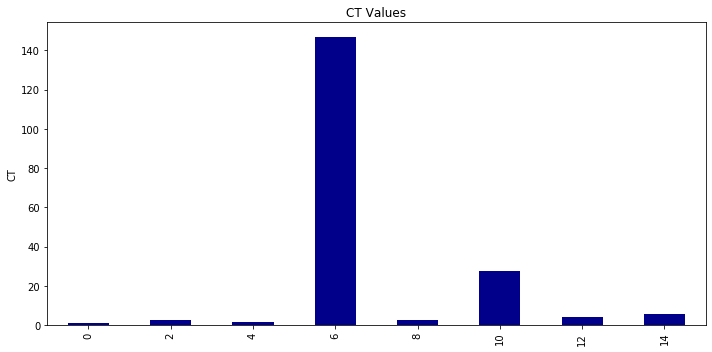

In [85]:
# bar graph with each gene 
# each bar represents differrent sample
output['Fold Inc'].plot(kind="bar", figsize=(10,5), color = "darkblue")
plt.title('CT Values')
plt.ylabel('CT') 

# make it neat
plt.tight_layout()
plt.show()

In [86]:
# output
output.to_excel("qpcr_ctvalues.xlsx")